In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

INPUT_SIZE = 28 * 28 
NUM_CLASSES = 10
BATCH_SIZE = 500 
EPOCHS = 5         
SEED = 42          

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    transforms.Lambda(lambda x: x.view(-1))
])

train_dataset = datasets.MNIST(root='../data', train=True, transform=transform, download=False)
test_dataset = datasets.MNIST(root='../data', train=False, transform=transform, download=False)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

## SGD

--- Starting Training for Learning Rate: 3.0 ---
LR: 3.0, Epoch [1/5], Final Batch Loss: 0.01602
LR: 3.0, Epoch [2/5], Final Batch Loss: 0.01277
LR: 3.0, Epoch [3/5], Final Batch Loss: 0.01125
LR: 3.0, Epoch [4/5], Final Batch Loss: 0.01071
LR: 3.0, Epoch [5/5], Final Batch Loss: 0.00911
Final Accuracy for LR 3.0: 92.74%

--- Starting Training for Learning Rate: 2.0 ---
LR: 2.0, Epoch [1/5], Final Batch Loss: 0.01606
LR: 2.0, Epoch [2/5], Final Batch Loss: 0.01284
LR: 2.0, Epoch [3/5], Final Batch Loss: 0.01139
LR: 2.0, Epoch [4/5], Final Batch Loss: 0.01073
LR: 2.0, Epoch [5/5], Final Batch Loss: 0.00953
Final Accuracy for LR 2.0: 92.33%

--- Starting Training for Learning Rate: 1.0 ---
LR: 1.0, Epoch [1/5], Final Batch Loss: 0.01752
LR: 1.0, Epoch [2/5], Final Batch Loss: 0.01382
LR: 1.0, Epoch [3/5], Final Batch Loss: 0.01199
LR: 1.0, Epoch [4/5], Final Batch Loss: 0.01133
LR: 1.0, Epoch [5/5], Final Batch Loss: 0.01072
Final Accuracy for LR 1.0: 92.09%

--- Starting Training for Le

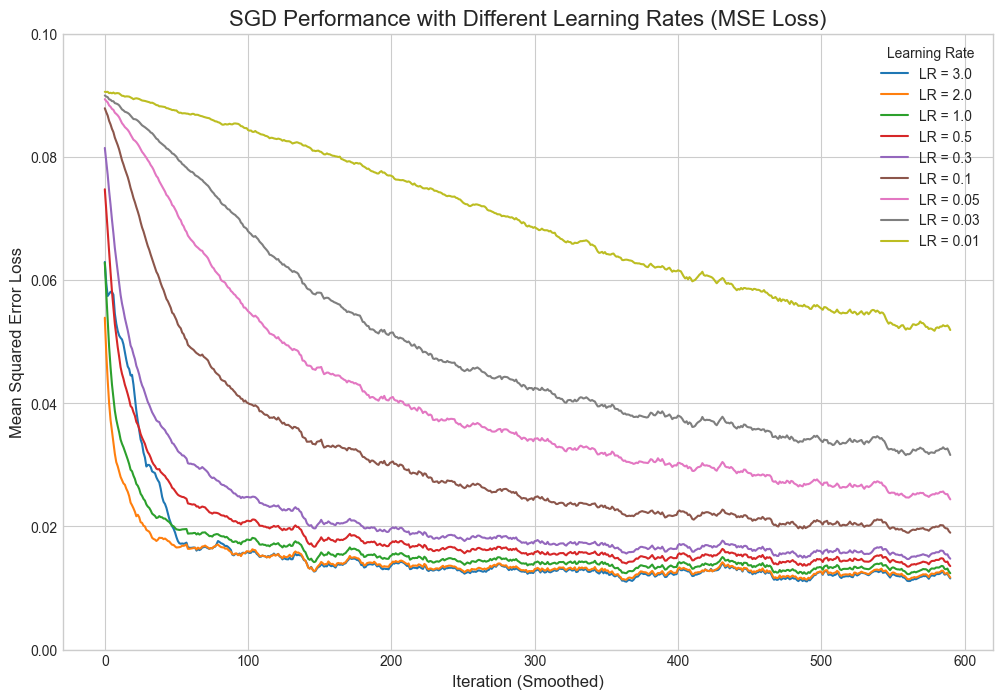

In [ ]:
# --- Loss Function ---
criterion = nn.MSELoss()
all_loss_histories = {}

# --- Learning Rates ---
LEARNING_RATES = [3.0, 2.0, 1.0, 0.5, 0.3, 0.1, 0.05, 0.03, 0.01]

for lr in LEARNING_RATES:
    print(f"--- Starting Training for Learning Rate: {lr} ---")
    torch.manual_seed(SEED)
    model = LogisticRegression(INPUT_SIZE, NUM_CLASSES)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    loss_history = []
    
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            logits = model(data)
            output_probs = torch.softmax(logits, dim=1)
            target_one_hot = nn.functional.one_hot(target, num_classes=NUM_CLASSES).float()
            loss = criterion(output_probs, target_one_hot)
            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_history.append(loss.item())
        
        print(f"LR: {lr}, Epoch [{epoch+1}/{EPOCHS}], Final Batch Loss: {loss.item():.5f}")

    # Update loss history
    all_loss_histories[lr] = loss_history

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    print(f"Final Accuracy for LR {lr}: {100 * correct / total:.2f}%\n")


# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
for lr, history in all_loss_histories.items():
    window_size = 10
    smoothed_history = np.convolve(history, np.ones(window_size)/window_size, mode='valid')
    plt.plot(smoothed_history, label=f'LR = {lr}')
plt.title('SGD Performance with Different Learning Rates (MSE Loss)', fontsize=16)
plt.xlabel('Iteration (Smoothed)', fontsize=12)
plt.ylabel('Mean Squared Error Loss', fontsize=12)
plt.legend(title='Learning Rate', fontsize=10)
plt.ylim(0, 0.1)
plt.show()

## ADAM

--- Starting Training for Adam with Learning Rate: 0.5 ---
LR: 0.5, Epoch [1/5], Final Batch Loss: 0.09037
LR: 0.5, Epoch [2/5], Final Batch Loss: 0.10090
LR: 0.5, Epoch [3/5], Final Batch Loss: 0.10112
LR: 0.5, Epoch [4/5], Final Batch Loss: 0.09115
LR: 0.5, Epoch [5/5], Final Batch Loss: 0.09800
Final Accuracy for LR 0.5: 53.15%

--- Starting Training for Adam with Learning Rate: 0.1 ---
LR: 0.1, Epoch [1/5], Final Batch Loss: 0.05390
LR: 0.1, Epoch [2/5], Final Batch Loss: 0.05390
LR: 0.1, Epoch [3/5], Final Batch Loss: 0.05332
LR: 0.1, Epoch [4/5], Final Batch Loss: 0.04770
LR: 0.1, Epoch [5/5], Final Batch Loss: 0.04871
Final Accuracy for LR 0.1: 73.78%

--- Starting Training for Adam with Learning Rate: 0.05 ---
LR: 0.05, Epoch [1/5], Final Batch Loss: 0.05156
LR: 0.05, Epoch [2/5], Final Batch Loss: 0.05078
LR: 0.05, Epoch [3/5], Final Batch Loss: 0.04874
LR: 0.05, Epoch [4/5], Final Batch Loss: 0.04583
LR: 0.05, Epoch [5/5], Final Batch Loss: 0.04572
Final Accuracy for LR 0.05:

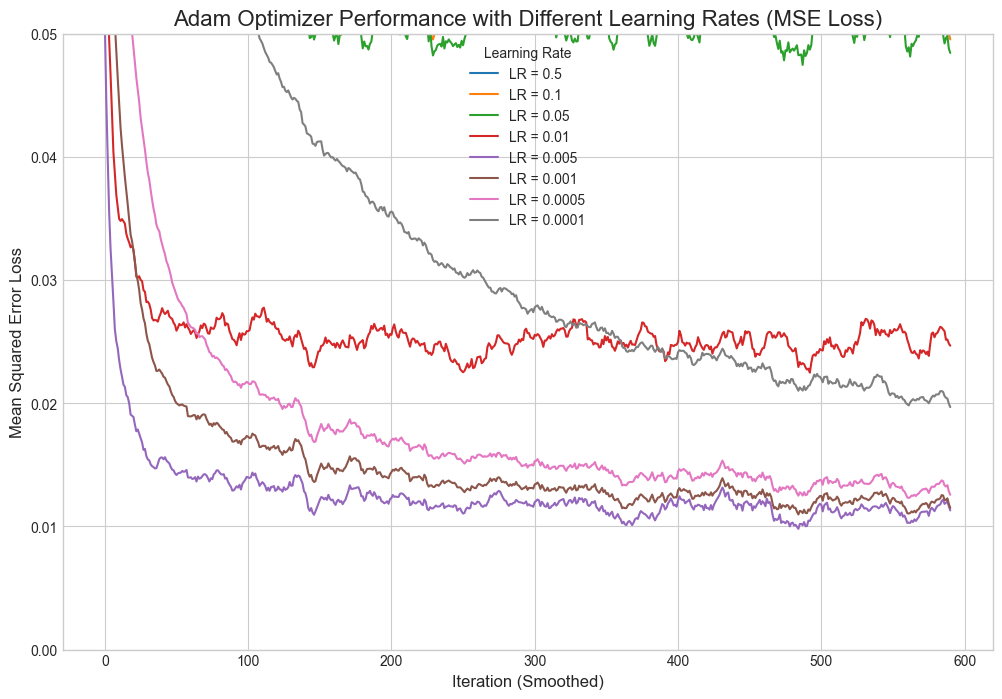

In [3]:
LEARNING_RATES = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
criterion = nn.MSELoss()
all_loss_histories = {}

for lr in LEARNING_RATES:
    print(f"--- Starting Training for Adam with Learning Rate: {lr} ---")
    torch.manual_seed(SEED)
    model = LogisticRegression(INPUT_SIZE, NUM_CLASSES)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    loss_history = []
    
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            logits = model(data)
            output_probs = torch.softmax(logits, dim=1)
            target_one_hot = nn.functional.one_hot(target, num_classes=NUM_CLASSES).float()
            loss = criterion(output_probs, target_one_hot)
            # Backward
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_history.append(loss.item())
        
        print(f"LR: {lr}, Epoch [{epoch+1}/{EPOCHS}], Final Batch Loss: {loss.item():.5f}")

    all_loss_histories[lr] = loss_history

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    print(f"Final Accuracy for LR {lr}: {100 * correct / total:.2f}%\n")


# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

for lr, history in all_loss_histories.items():
    window_size = 10
    if len(history) > window_size:
        smoothed_history = np.convolve(history, np.ones(window_size)/window_size, mode='valid')
        plt.plot(smoothed_history, label=f'LR = {lr}')
    else:
        plt.plot(history, label=f'LR = {lr}')

plt.title('Adam Optimizer Performance with Different Learning Rates (MSE Loss)', fontsize=16)
plt.xlabel('Iteration (Smoothed)', fontsize=12)
plt.ylabel('Mean Squared Error Loss', fontsize=12)
plt.legend(title='Learning Rate', fontsize=10)
plt.ylim(0, 0.05)
plt.show()

## OLNM (eps=1)

--- Starting Training for OLNM with Learning Rate: 3.0 ---
LR: 3.0, Epoch [1/5], Final Batch Loss: 0.03656
LR: 3.0, Epoch [2/5], Final Batch Loss: 0.03586
LR: 3.0, Epoch [3/5], Final Batch Loss: 0.03434
LR: 3.0, Epoch [4/5], Final Batch Loss: 0.02295
LR: 3.0, Epoch [5/5], Final Batch Loss: 0.02084
Final Accuracy for LR 3.0: 83.45%

--- Starting Training for OLNM with Learning Rate: 2.0 ---
LR: 2.0, Epoch [1/5], Final Batch Loss: 0.02684
LR: 2.0, Epoch [2/5], Final Batch Loss: 0.02564
LR: 2.0, Epoch [3/5], Final Batch Loss: 0.02204
LR: 2.0, Epoch [4/5], Final Batch Loss: 0.02284
LR: 2.0, Epoch [5/5], Final Batch Loss: 0.01945
Final Accuracy for LR 2.0: 84.10%

--- Starting Training for OLNM with Learning Rate: 1.0 ---
LR: 1.0, Epoch [1/5], Final Batch Loss: 0.01514
LR: 1.0, Epoch [2/5], Final Batch Loss: 0.01190
LR: 1.0, Epoch [3/5], Final Batch Loss: 0.01074
LR: 1.0, Epoch [4/5], Final Batch Loss: 0.01053
LR: 1.0, Epoch [5/5], Final Batch Loss: 0.00892
Final Accuracy for LR 1.0: 92.72%

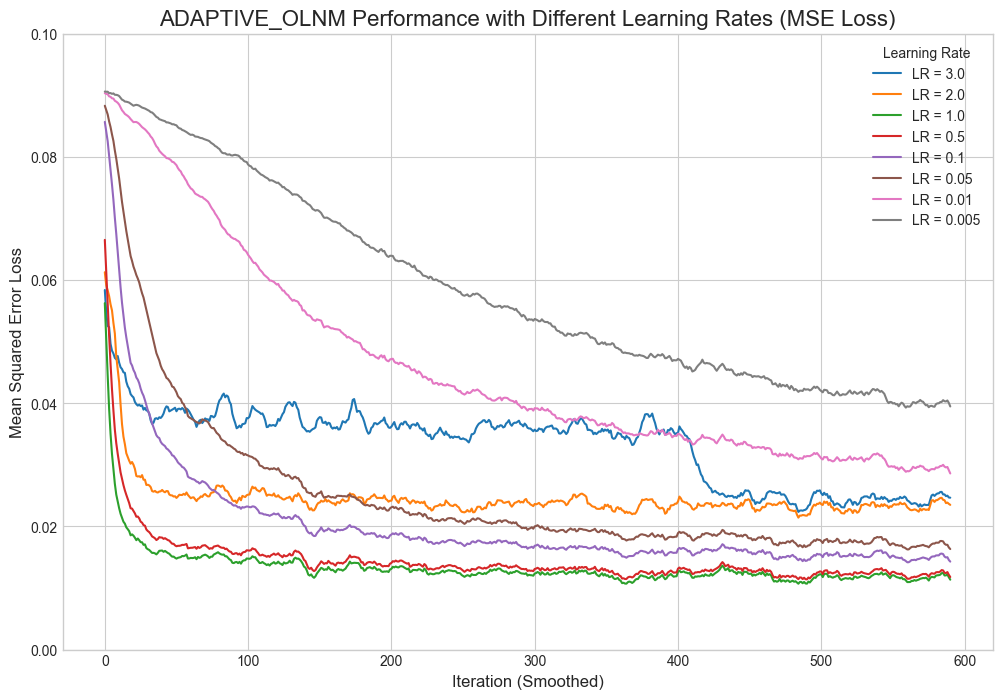

In [3]:
LEARNING_RATES = [3.0, 2.0, 1.0, 0.5, 0.1, 0.05, 0.01, 0.005]
criterion = nn.MSELoss()
all_loss_histories = {}

for lr in LEARNING_RATES:
    print(f"--- Starting Training for OLNM with Learning Rate: {lr} ---")
    torch.manual_seed(SEED)
    from olnm_raw import OLNM as ORIGINAL_OLNM
    model = LogisticRegression(INPUT_SIZE, NUM_CLASSES)
    optimizer = ORIGINAL_OLNM(model.parameters(), lr=lr, epsilon=1, batch_size=BATCH_SIZE)

    loss_history = []
    
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            def closure(grad=True):
                logits = model(data)
                output_probs = torch.softmax(logits, dim=1)
                target_one_hot = nn.functional.one_hot(target, num_classes=NUM_CLASSES).float()
                loss = criterion(output_probs, target_one_hot)
                if grad:
                    optimizer.zero_grad()
                    loss.backward()
                return loss

            loss = optimizer.step(closure)

            loss_history.append(loss.item())
        
        print(f"LR: {lr}, Epoch [{epoch+1}/{EPOCHS}], Final Batch Loss: {loss.item():.5f}")

    all_loss_histories[lr] = loss_history

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    print(f"Final Accuracy for LR {lr}: {100 * correct / total:.2f}%\n")


# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

for lr, history in all_loss_histories.items():
    window_size = 10
    if len(history) > window_size:
        smoothed_history = np.convolve(history, np.ones(window_size)/window_size, mode='valid')
        plt.plot(smoothed_history, label=f'LR = {lr}')
    else:
        plt.plot(history, label=f'LR = {lr}')

plt.title('ADAPTIVE_OLNM Performance with Different Learning Rates (MSE Loss)', fontsize=16)
plt.xlabel('Iteration (Smoothed)', fontsize=12)
plt.ylabel('Mean Squared Error Loss', fontsize=12)
plt.legend(title='Learning Rate', fontsize=10)
plt.ylim(0, 0.1)
plt.show()

## OLNM (eps=3)

--- Starting Training for OLNM with Learning Rate: 3.0 ---
Sub loop T = : 68
LR: 3.0, Epoch [1/5], Final Batch Loss: 0.04011
Sub loop T = : 68
Sub loop T = : 68
LR: 3.0, Epoch [2/5], Final Batch Loss: 0.03680
Sub loop T = : 68
Sub loop T = : 21
LR: 3.0, Epoch [3/5], Final Batch Loss: 0.03513
Sub loop T = : 68
Sub loop T = : 68
LR: 3.0, Epoch [4/5], Final Batch Loss: 0.03396
Sub loop T = : 68
Sub loop T = : 68
Sub loop T = : 2
LR: 3.0, Epoch [5/5], Final Batch Loss: 0.03308
Final Accuracy for LR 3.0: 75.02%

--- Starting Training for OLNM with Learning Rate: 2.0 ---
Sub loop T = : 68
LR: 2.0, Epoch [1/5], Final Batch Loss: 0.02641
Sub loop T = : 68
Sub loop T = : 68
LR: 2.0, Epoch [2/5], Final Batch Loss: 0.02573
Sub loop T = : 68
Sub loop T = : 68
LR: 2.0, Epoch [3/5], Final Batch Loss: 0.02115
Sub loop T = : 68
Sub loop T = : 68
LR: 2.0, Epoch [4/5], Final Batch Loss: 0.02412
Sub loop T = : 17
Sub loop T = : 68
Sub loop T = : 2
LR: 2.0, Epoch [5/5], Final Batch Loss: 0.02003
Final Acc

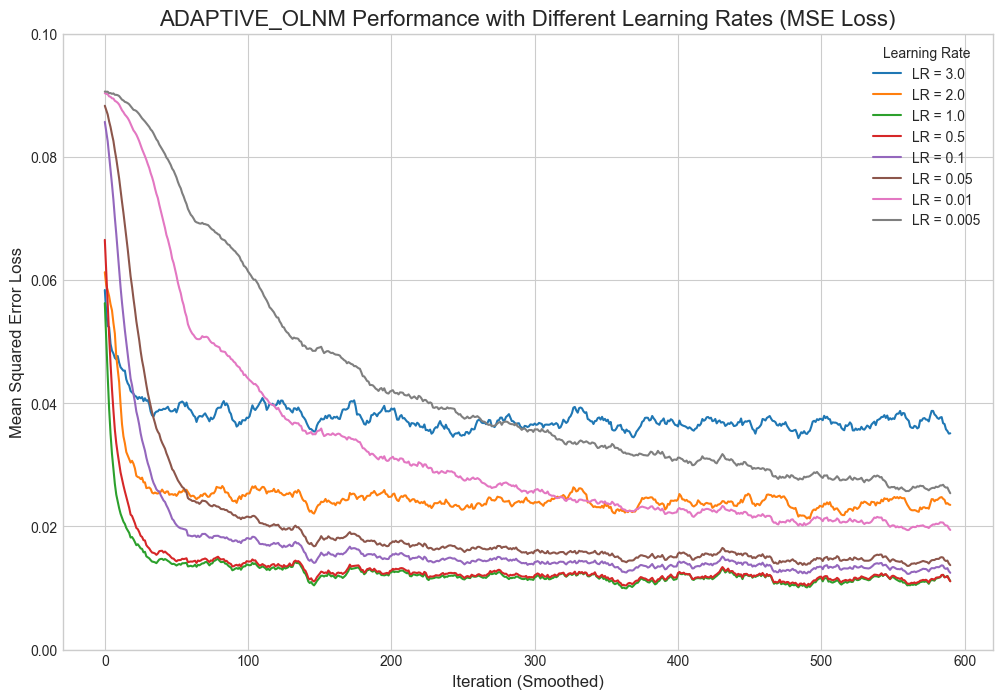

In [ ]:

LEARNING_RATES = [3.0, 2.0, 1.0, 0.5, 0.1, 0.05, 0.01, 0.005]
criterion = nn.MSELoss()
all_loss_histories = {}

for lr in LEARNING_RATES:
    print(f"--- Starting Training for OLNM with Learning Rate: {lr} ---")
    torch.manual_seed(SEED)
    from olnm_raw import OLNM as ORIGINAL_OLNM
    model = LogisticRegression(INPUT_SIZE, NUM_CLASSES)
    
    optimizer = ORIGINAL_OLNM(model.parameters(), lr=lr, epsilon=3, batch_size=BATCH_SIZE)

    loss_history = []
    
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            def closure(grad=True):
                logits = model(data)
                output_probs = torch.softmax(logits, dim=1)
                target_one_hot = nn.functional.one_hot(target, num_classes=NUM_CLASSES).float()
                loss = criterion(output_probs, target_one_hot)
                if grad:
                    optimizer.zero_grad()
                    loss.backward()
                return loss
            loss = optimizer.step(closure)

            loss_history.append(loss.item())
        
        print(f"LR: {lr}, Epoch [{epoch+1}/{EPOCHS}], Final Batch Loss: {loss.item():.5f}")

    all_loss_histories[lr] = loss_history

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    print(f"Final Accuracy for LR {lr}: {100 * correct / total:.2f}%\n")


# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

for lr, history in all_loss_histories.items():
    window_size = 10
    if len(history) > window_size:
        smoothed_history = np.convolve(history, np.ones(window_size)/window_size, mode='valid')
        plt.plot(smoothed_history, label=f'LR = {lr}')
    else:
        plt.plot(history, label=f'LR = {lr}')
plt.title('ADAPTIVE_OLNM Performance with Different Learning Rates (MSE Loss)', fontsize=16)
plt.xlabel('Iteration (Smoothed)', fontsize=12)
plt.ylabel('Mean Squared Error Loss', fontsize=12)
plt.legend(title='Learning Rate', fontsize=10)
plt.ylim(0, 0.1)
plt.show()

## OLNM (eps=3, ftest=0.5)

In [4]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath('..'))

# Now you can import your file
import olnm 

--- Starting Training for OLNM with Learning Rate: 3.0 ---
Sub loop T = : 68
Sub loop T = : 46
Sub loop T = : 2
LR: 3.0, Epoch [1/5], Final Batch Loss: 0.03651
Sub loop T = : 5
Sub loop T = : 11
Sub loop T = : 12
Sub loop T = : 14
Sub loop T = : 2
Sub loop T = : 3
Sub loop T = : 2
Sub loop T = : 6
Sub loop T = : 3
Sub loop T = : 2
Sub loop T = : 20
Sub loop T = : 7
Sub loop T = : 3
Sub loop T = : 5
Sub loop T = : 2
Sub loop T = : 2
Sub loop T = : 3
Sub loop T = : 5
Sub loop T = : 12
Sub loop T = : 3
LR: 3.0, Epoch [2/5], Final Batch Loss: 0.03494
Sub loop T = : 11
Sub loop T = : 6
Sub loop T = : 2
Sub loop T = : 36
Sub loop T = : 13
Sub loop T = : 11
Sub loop T = : 14
Sub loop T = : 3
LR: 3.0, Epoch [3/5], Final Batch Loss: 0.04146
Sub loop T = : 30
Sub loop T = : 23
Sub loop T = : 6
Sub loop T = : 4
Sub loop T = : 2
Sub loop T = : 2
Sub loop T = : 27
Sub loop T = : 2
Sub loop T = : 2
Sub loop T = : 2
Sub loop T = : 21
Sub loop T = : 15
Sub loop T = : 2
LR: 3.0, Epoch [4/5], Final Batc

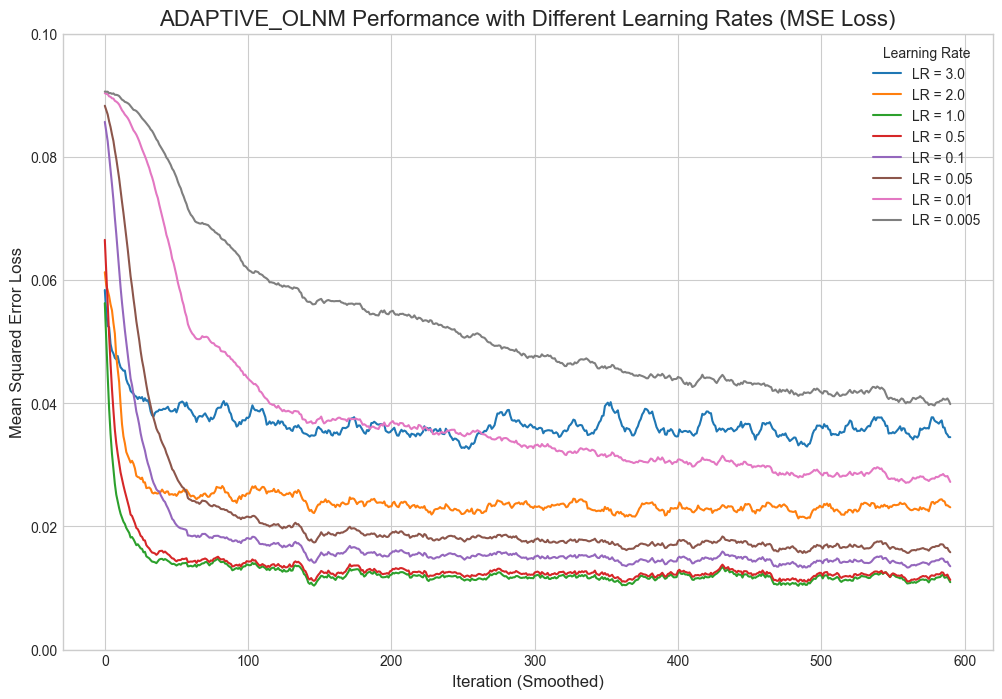

In [ ]:
criterion = nn.MSELoss()
all_loss_histories = {}

LEARNING_RATES = [3.0, 2.0, 1.0, 0.5, 0.1, 0.05, 0.01, 0.005]
for lr in LEARNING_RATES:
    print(f"--- Starting Training for OLNM with Learning Rate: {lr} ---")
    torch.manual_seed(SEED)
    from ..olnm import OLNM as ADAPTIVE_OLNM
    model = LogisticRegression(INPUT_SIZE, NUM_CLASSES)
    optimizer = ADAPTIVE_OLNM(model.parameters(), lr=lr, epsilon=3, batch_size=BATCH_SIZE)

    loss_history = []
    
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            def closure(grad=True):
                logits = model(data)
                output_probs = torch.softmax(logits, dim=1)
                target_one_hot = nn.functional.one_hot(target, num_classes=NUM_CLASSES).float()
                loss = criterion(output_probs, target_one_hot)
                if grad:
                    optimizer.zero_grad()
                    loss.backward()
                return loss
            loss = optimizer.step(closure)

            loss_history.append(loss.item())
        
        print(f"LR: {lr}, Epoch [{epoch+1}/{EPOCHS}], Final Batch Loss: {loss.item():.5f}")

    all_loss_histories[lr] = loss_history

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    print(f"Final Accuracy for LR {lr}: {100 * correct / total:.2f}%\n")


# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
for lr, history in all_loss_histories.items():
    window_size = 10
    if len(history) > window_size:
        smoothed_history = np.convolve(history, np.ones(window_size)/window_size, mode='valid')
        plt.plot(smoothed_history, label=f'LR = {lr}')
    else:
        plt.plot(history, label=f'LR = {lr}')
plt.title('ADAPTIVE_OLNM Performance with Different Learning Rates (MSE Loss)', fontsize=16)
plt.xlabel('Iteration (Smoothed)', fontsize=12)
plt.ylabel('Mean Squared Error Loss', fontsize=12)
plt.legend(title='Learning Rate', fontsize=10)
plt.ylim(0, 0.1)
plt.show()